# Explicación visual paso a paso

In [1]:
import matplotlib.pyplot as plt
import random

from daugman_visual_explanation import DaugmanVisualExplanation
from daugman import find_iris

In [2]:
# fixed size for matplotlib output
plt.rcParams['figure.figsize'] = [5, 5]
# for replicability
random.seed(2020)

dve = DaugmanVisualExplanation('eye.jpg')

## Algoritmo Daugman

El algoritmo de Daugman mide la diferencia en las intensidades de píxeles promedio en una imagen en escala de grises para un grupo de círculos con el mismo centro y radio diferente.
La idea es encontrar la mayor caída en los valores de intensidad entre dos círculos vecinos. Debería implicar la transición entre el iris y su entorno.
Por ejemplo, en la imagen de abajo, los círculos amarillo, verde y rojo tienen las mismas intensidades de píxeles porque todos los píxeles debajo son negros. Por lo tanto, los deltas (diferencia) entre todas esas intensidades son 0 (amarillo-verde, verde-rojo). Pero los píxeles debajo del círculo azul son todos blancos, por lo que la diferencia entre rojo y azul es la más alta, lo que significa que el círculo rojo es la mejor aproximación para el borde del iris. En caso de que no tuviéramos un círculo rojo, la diferencia verde-azul tendría la mayor diferencia, por lo que se habría elegido el círculo verde.

Idealmente, para obtener la mejor precisión, el paso entre los radios de los círculos debe ser de 1 px.


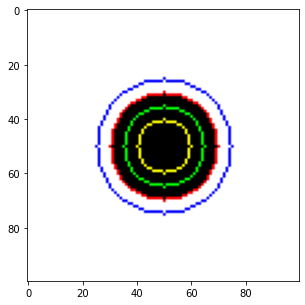

In [3]:
dve.plot_pixel_intensity_delta_pic()

Además, no es difícil ver que la selección del punto central es muy importante y para obtener la mejor precisión, debemos verificar cada punto de la imagen. Es computacionalmente costoso, por lo que debemos encontrar una manera de reducir el número de puntos potenciales.

Para evitar resultados falsos positivos, el algoritmo aplica un filtro GaussianBlur en todos los deltas recopilados para un único centro de iris potencial, reduce el ruido y hace que los resultados sean más suaves.


## Encontrando el Iris

Para reducir el número de puntos potenciales, implicaremos que el iris no puede ser mayor que 1/3 del lado de la imagen si el ojo está correctamente recortado.

Por lo tanto, no tenemos que verificar cada píxel de la imagen, solo aquellos que están en el 1/3 central de la imagen.

Para cada uno de estos puntos, necesitaremos ejecutar el algoritmo de Daugman. En este ejemplo, solo tomaremos cada tercer punto para mayor claridad. Por lo tanto, tendremos una velocidad x3, con una precisión ligeramente menor. 


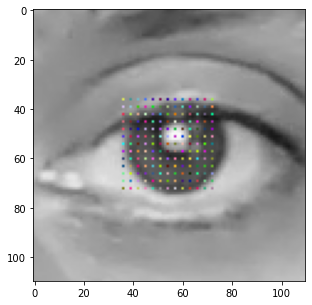

In [6]:
# Dibujar todos los potenciales centros de Iris
img_dot = dve.plot_all_potential_iris_centers()

Además, suponemos que la región del iris no puede ser menor que un círculo con cierto radio, digamos 10px, y tampoco puede ser mayor que cierto radio, digamos 30px.
Ahora, para cada círculo entre el radio mínimo y máximo con el paso 2px, tomaremos todos los valores de píxeles y los sumaremos.


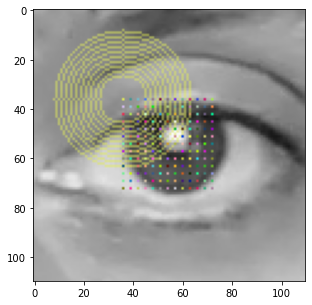

In [7]:
img_circles = dve.plot_circles_for_one_center(img_dot, dot_idx=0)

El algoritmo de Daugman encontrará el mejor candidato de iris entre esos círculos, para ese punto.

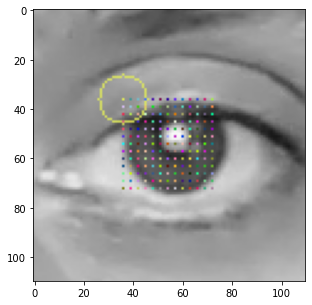

In [10]:
_ = dve.plot_best_circle_for_a_few_potential_iris_centers(img_dot, [0])

Hagamos lo mismo para 30 puntos potenciales de centro de región de iris.

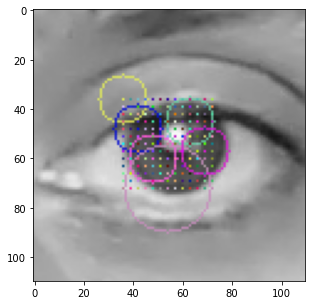

In [12]:
_ = dve.plot_best_circle_for_a_few_potential_iris_centers(img_dot, range(0, len(dve.all_points), 30))

Y ahora para cada punto potencial. La imagen resultante es difícil de percibir, pero se seleccionará el mejor candidato para el iris entre los círculos trazados.

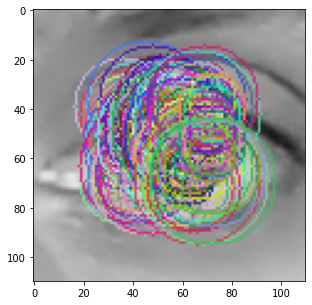

In [8]:
_ = dve.plot_best_circle_for_a_few_potential_iris_centers(img_dot, range(0, len(dve.all_points)))

Será el círculo con el valor más alto (mayor delta). Con los parámetros seleccionados, sería el resultado a continuación:

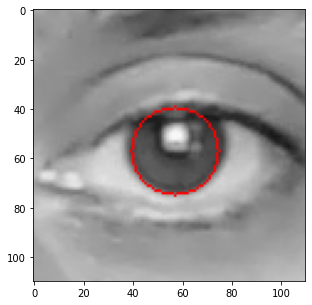

In [9]:
_ = dve.find_iris(daugman_start=10, daugman_end=30, daugman_step=2, points_step=3)

Si modificamos el paso del radio de 2px a 1px, obtendremos un mejor resultado pero el procesamiento será más lento:

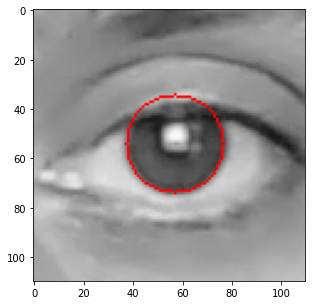

In [10]:
_ = dve.find_iris(daugman_start=10, daugman_end=30, daugman_step=1, points_step=3)

La configuración de los parámetros computacionalmente mas costosa y potencialmente más precisa es:

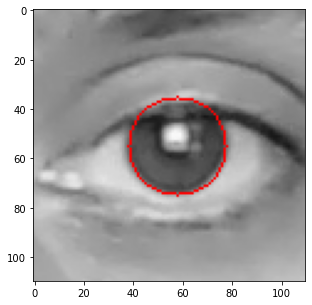

In [13]:
_ = dve.find_iris(daugman_start=10, daugman_end=50, daugman_step=1, points_step=1)

## Modificación de parámetros

Realizaremos variaciones en los parámetros del algoritmo Daugman

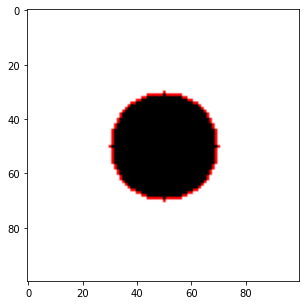

In [14]:
dve.find_iris_on_binary_image(daugman_start=10, daugman_end=30, daugman_step=2, points_step=1)

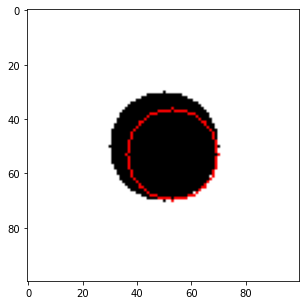

In [15]:
dve.find_iris_on_binary_image(daugman_start=10, daugman_end=30, daugman_step=1, points_step=10)

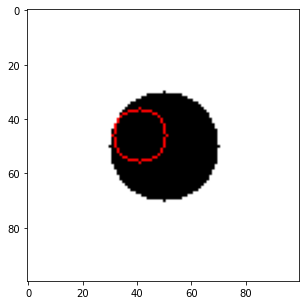

In [16]:
dve.find_iris_on_binary_image(daugman_start=10, daugman_end=30, daugman_step=10, points_step=1)